<a href="https://colab.research.google.com/github/AnanyaGodse/Machine-Learning-II-Deep-Learning-/blob/main/Experiment_10_Analysis_of_Transfer_Learning_Perfomance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Ananya Godse SAP ID: 60009220161 Batch: D1-1**

#### **LAB 10 - Analysis of Transfer Learning Performance**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the CIFAR 10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
subset_size = 10000
x_train_subset = x_train[:subset_size]
y_train_subset = y_train[:subset_size]
x_train_resized_subset = tf.image.resize(x_train_subset, (224, 224)).numpy()
x_test_resized = tf.image.resize(x_test, (224, 224)).numpy()

In [ ]:
# 1. LeNet-5
def lenet5():
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(32, 32, 3), padding='same'))
    model.add(layers.AveragePooling2D())
    model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
    model.add(layers.AveragePooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='tanh'))
    model.add(layers.Dense(84, activation='tanh'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# 2. AlexNet
def alexnet():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# 3. VGG-16
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# 4. Inception-v1
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception_model.trainable = False

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# 5. ResNet-50
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50_model.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
def build_model(base_model, input_shape=(224, 224, 3)):
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
lenet5_model = lenet5()
alexnet_model = alexnet()
vgg16_fine_tuned = build_model(vgg16_model)
inception_fine_tuned = build_model(inception_model)
resnet50_fine_tuned = build_model(resnet50_model)

In [ ]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, model_name):
    print(f"Training {model_name}...")
    model.fit(x_train, y_train, epochs=5, batch_size=20, validation_split=0.2)
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")
    return accuracy

In [ ]:
accuracies = {}
accuracies['LeNet-5'] = train_and_evaluate(lenet5_model, x_train_subset, y_train_subset, x_test, y_test, "LeNet-5")
accuracies['AlexNet'] = train_and_evaluate(alexnet_model, x_train_subset, y_train_subset, x_test, y_test, "AlexNet")
accuracies['VGG-16'] = train_and_evaluate(vgg16_fine_tuned, x_train_resized_subset, y_train_subset, x_test_resized, y_test, "VGG-16")
accuracies['Inception-v1'] = train_and_evaluate(inception_fine_tuned, x_train_resized_subset, y_train_subset, x_test_resized, y_test, "Inception-v1")
accuracies['ResNet-50'] = train_and_evaluate(resnet50_fine_tuned, x_train_resized_subset, y_train_subset, x_test_resized, y_test, "ResNet-50")

Training LeNet-5...
Epoch 1/5
400/400 [==============================] - 4s 8ms/step - loss: 1.5434 - accuracy: 0.4676 - val_loss: 1.6488 - val_accuracy: 0.4185
Epoch 2/5
400/400 [==============================] - 3s 8ms/step - loss: 1.4787 - accuracy: 0.4860 - val_loss: 1.5943 - val_accuracy: 0.4465
Epoch 3/5
400/400 [==============================] - 3s 8ms/step - loss: 1.4043 - accuracy: 0.5131 - val_loss: 1.5826 - val_accuracy: 0.4435
Epoch 4/5
400/400 [==============================] - 3s 8ms/step - loss: 1.3307 - accuracy: 0.5339 - val_loss: 1.5580 - val_accuracy: 0.4595
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.5638 - accuracy: 0.4573
LeNet-5 Test Accuracy: 0.4573
Training AlexNet...
Epoch 1/5
400/400 [==============================] - 14s 33ms/step - loss: 2.0398 - accuracy: 0.2264 - val_loss: 1.8459 - val_accuracy: 0.3020
Epoch 2/5
400/400 [==============================] - 13s 32ms/step - loss: 1.7612 - accuracy: 0.3377 - val_loss: 1.6053 - va

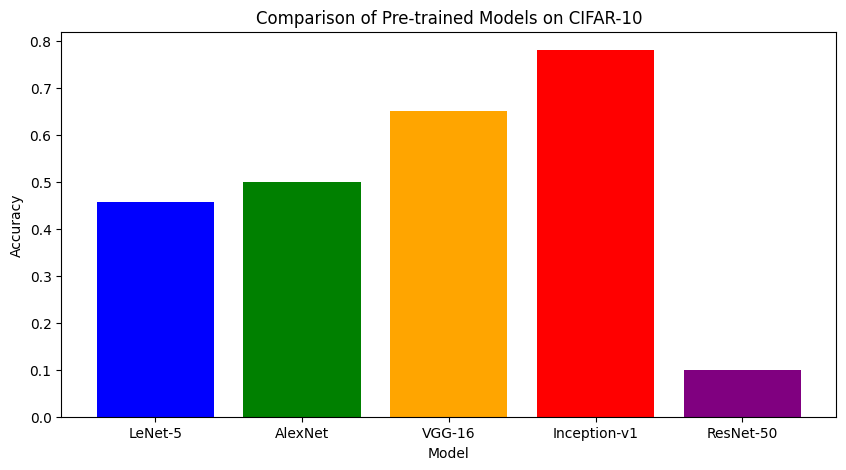

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Pre-trained Models on CIFAR-10')
plt.show()

**Conclusion:**

* The highest accuracy was of Inception-v1, followed by VGG-16.
* The lowest accuracy was of ResNet-50.
* VGG-16 took the longest time to train, while Lenet-50 took the shortest.